In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing Libraries**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing as preprocessing

**Load Dataset**

In [3]:
df1=pd.read_csv('/content/drive/MyDrive/miniproject/dataset/Churn_Modelling.csv')

In [4]:
import numpy as np
from scipy import stats

**Count Plots**

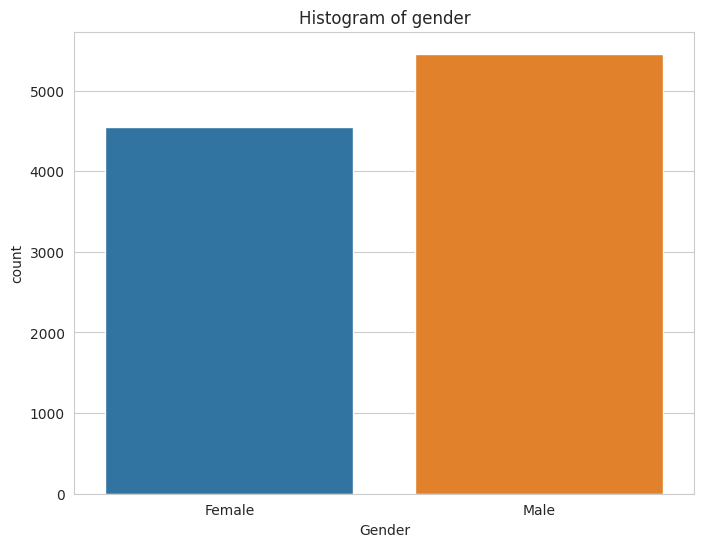

In [5]:
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
plt.title("Histogram of gender")
sns.countplot(x='Gender', data=df1)
plt.show()

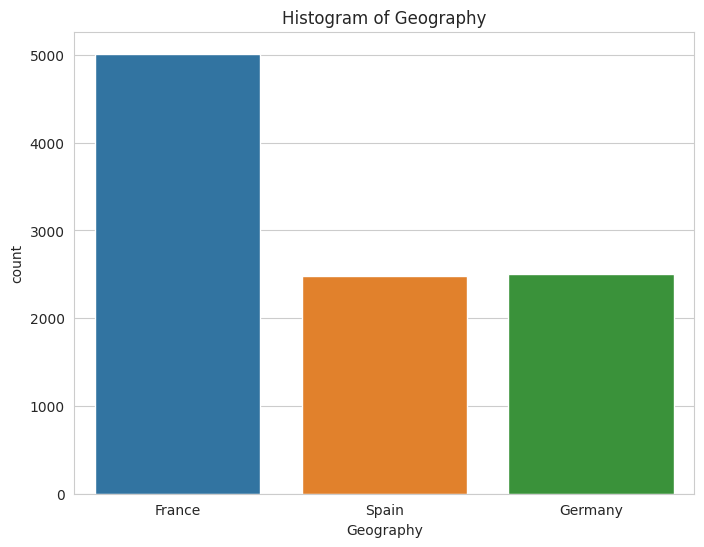

In [6]:
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
plt.title("Histogram of Geography")
sns.countplot(x='Geography', data=df1)
plt.show()

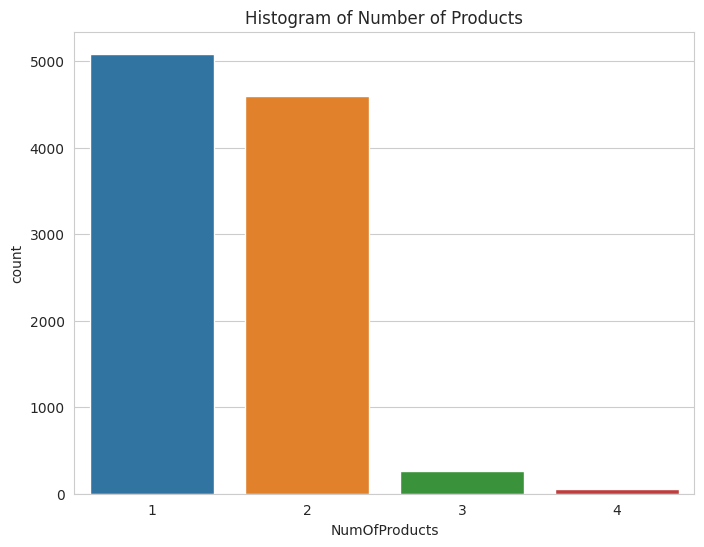

In [7]:
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
plt.title("Histogram of Number of Products")
sns.countplot(x='NumOfProducts', data=df1)
plt.show()

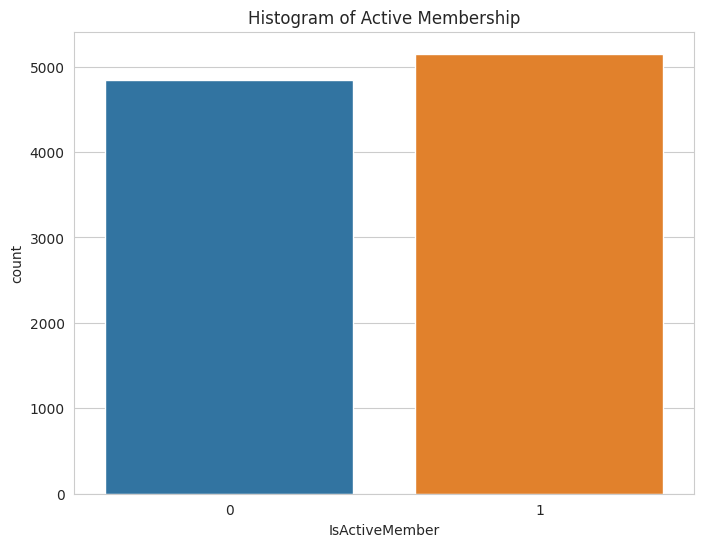

In [8]:
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
plt.title("Histogram of Active Membership")
sns.countplot(x='IsActiveMember', data=df1)
plt.show()

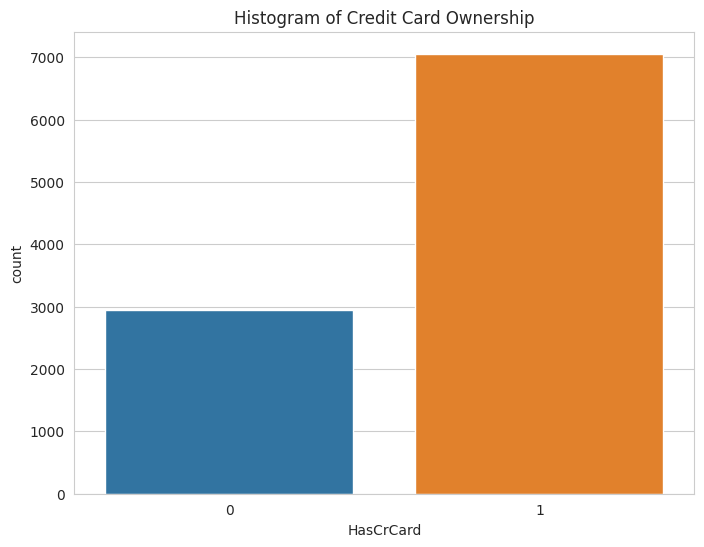

In [9]:
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
plt.title("Histogram of Credit Card Ownership")
sns.countplot(x='HasCrCard', data=df1)
plt.show()

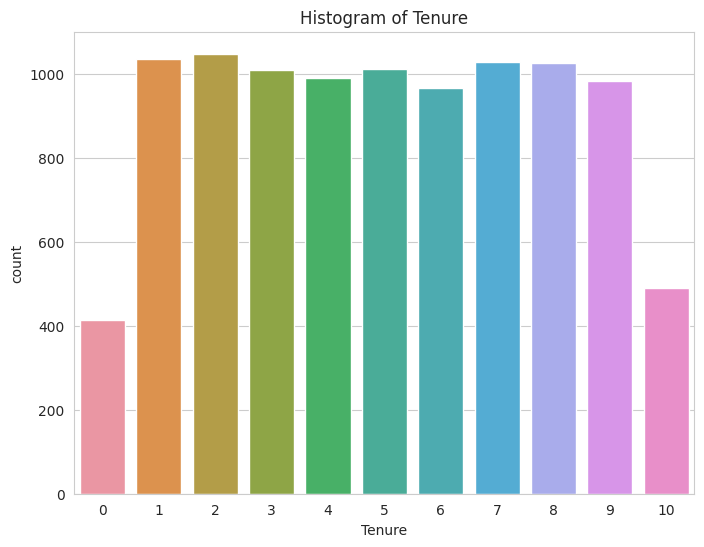

In [10]:
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
plt.title("Histogram of Tenure")
sns.countplot(x='Tenure', data=df1)
plt.show()

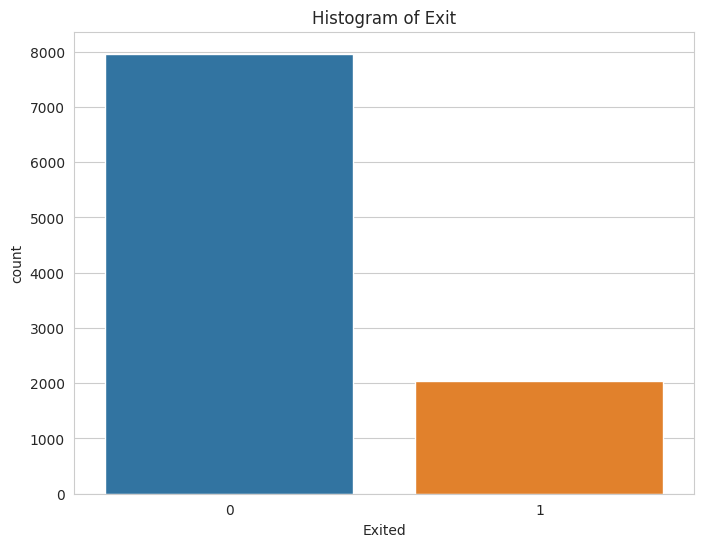

In [11]:
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
plt.title("Histogram of Exit")
sns.countplot(x='Exited', data=df1)
plt.show()

**Box Plot of numeric features**

<Axes: xlabel='Exited', ylabel='Tenure'>

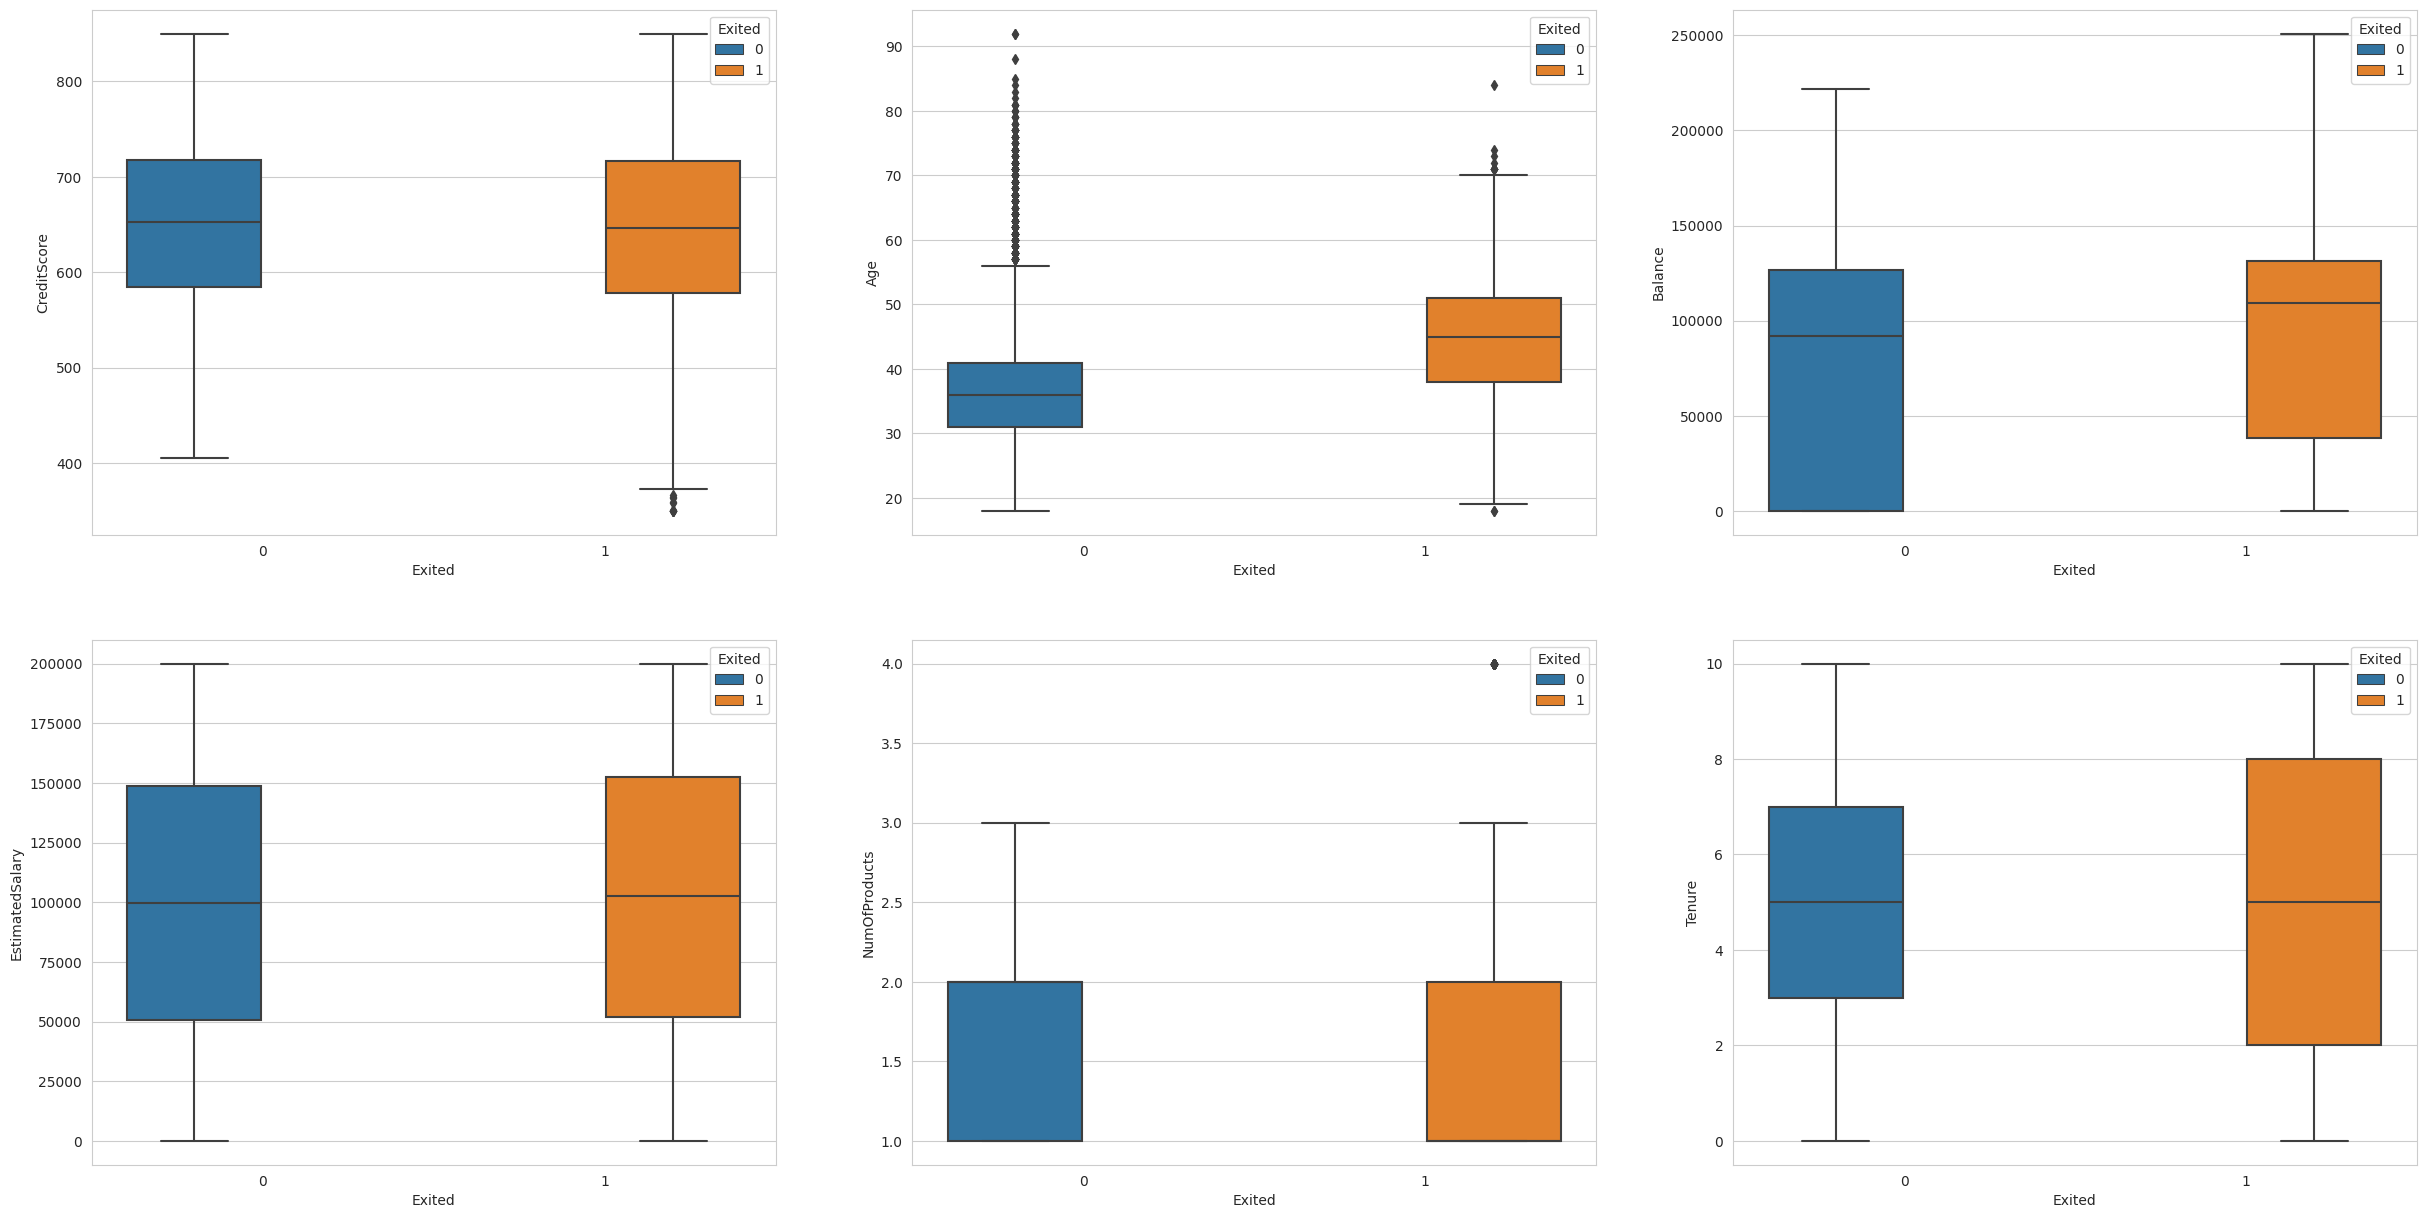

In [12]:

fig, ax = plt.subplots(2, 3, figsize=(30, 15))

sns.boxplot(data=df1, x='Exited', y='CreditScore', hue='Exited', ax=ax[0][0])
sns.boxplot(data=df1, x='Exited', y='Age', hue='Exited', ax=ax[0][1])
sns.boxplot(data=df1, x='Exited', y='Balance', hue='Exited', ax=ax[0][2])
sns.boxplot(data=df1, x='Exited', y='EstimatedSalary', hue='Exited', ax=ax[1][0])
sns.boxplot(data=df1, x='Exited', y='NumOfProducts', hue='Exited', ax=ax[1][1])
sns.boxplot(data=df1, x='Exited', y='Tenure', hue='Exited', ax=ax[1][2])

**Calculate number of outliers**

In [13]:
numerical_features = ['Age', 'CreditScore','NumOfProducts', 'Tenure', 'Balance', 'EstimatedSalary', 'HasCrCard', 'IsActiveMember']

# Calculate IQR for each numerical feature
Q1 = df1[numerical_features].quantile(0.25)
Q3 = df1[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers for each feature
outliers_count = ((df1[numerical_features] < lower_bound) | (df1[numerical_features] > upper_bound)).sum()

print("Number of outliers for each feature:")
print(outliers_count)

Number of outliers for each feature:
Age                359
CreditScore         15
NumOfProducts       60
Tenure               0
Balance              0
EstimatedSalary      0
HasCrCard            0
IsActiveMember       0
dtype: int64


**Removing Outliers**

In [14]:
# Calculate Q1 and Q3 for each column
Q1 = df1[['Age', 'CreditScore','NumOfProducts']].quantile(0.25)

Q3 = df1[['Age', 'CreditScore','NumOfProducts']].quantile(0.75)

# Calculate IQR for each column
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from specific columns
df = df1[
    (df1['Age'] >= lower_bound['Age']) & (df1['Age'] <= upper_bound['Age']) &
    (df1['CreditScore'] >= lower_bound['CreditScore']) & (df1['CreditScore'] <= upper_bound['CreditScore']) &
    (df1['NumOfProducts'] >= lower_bound['NumOfProducts']) & (df1['NumOfProducts'] <= upper_bound['NumOfProducts'])
]

# Print the shape of the new dataframe without outliers
print("Shape of DataFrame after removing outliers:", df.shape)

Shape of DataFrame after removing outliers: (9568, 14)


**Final outlier count**

In [15]:
numerical_features = ['Age', 'CreditScore','NumOfProducts']

# Calculate IQR for each numerical feature
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers for each feature
outliers_count = ((df[numerical_features] < lower_bound) | (df[numerical_features] > upper_bound)).sum()

print("Number of outliers for each feature:")
print(outliers_count)

Number of outliers for each feature:
Age              163
CreditScore        1
NumOfProducts      0
dtype: int64


In [16]:
df.shape

(9568, 14)

**Box Plot after removing outliers**

<Axes: xlabel='Exited', ylabel='Tenure'>

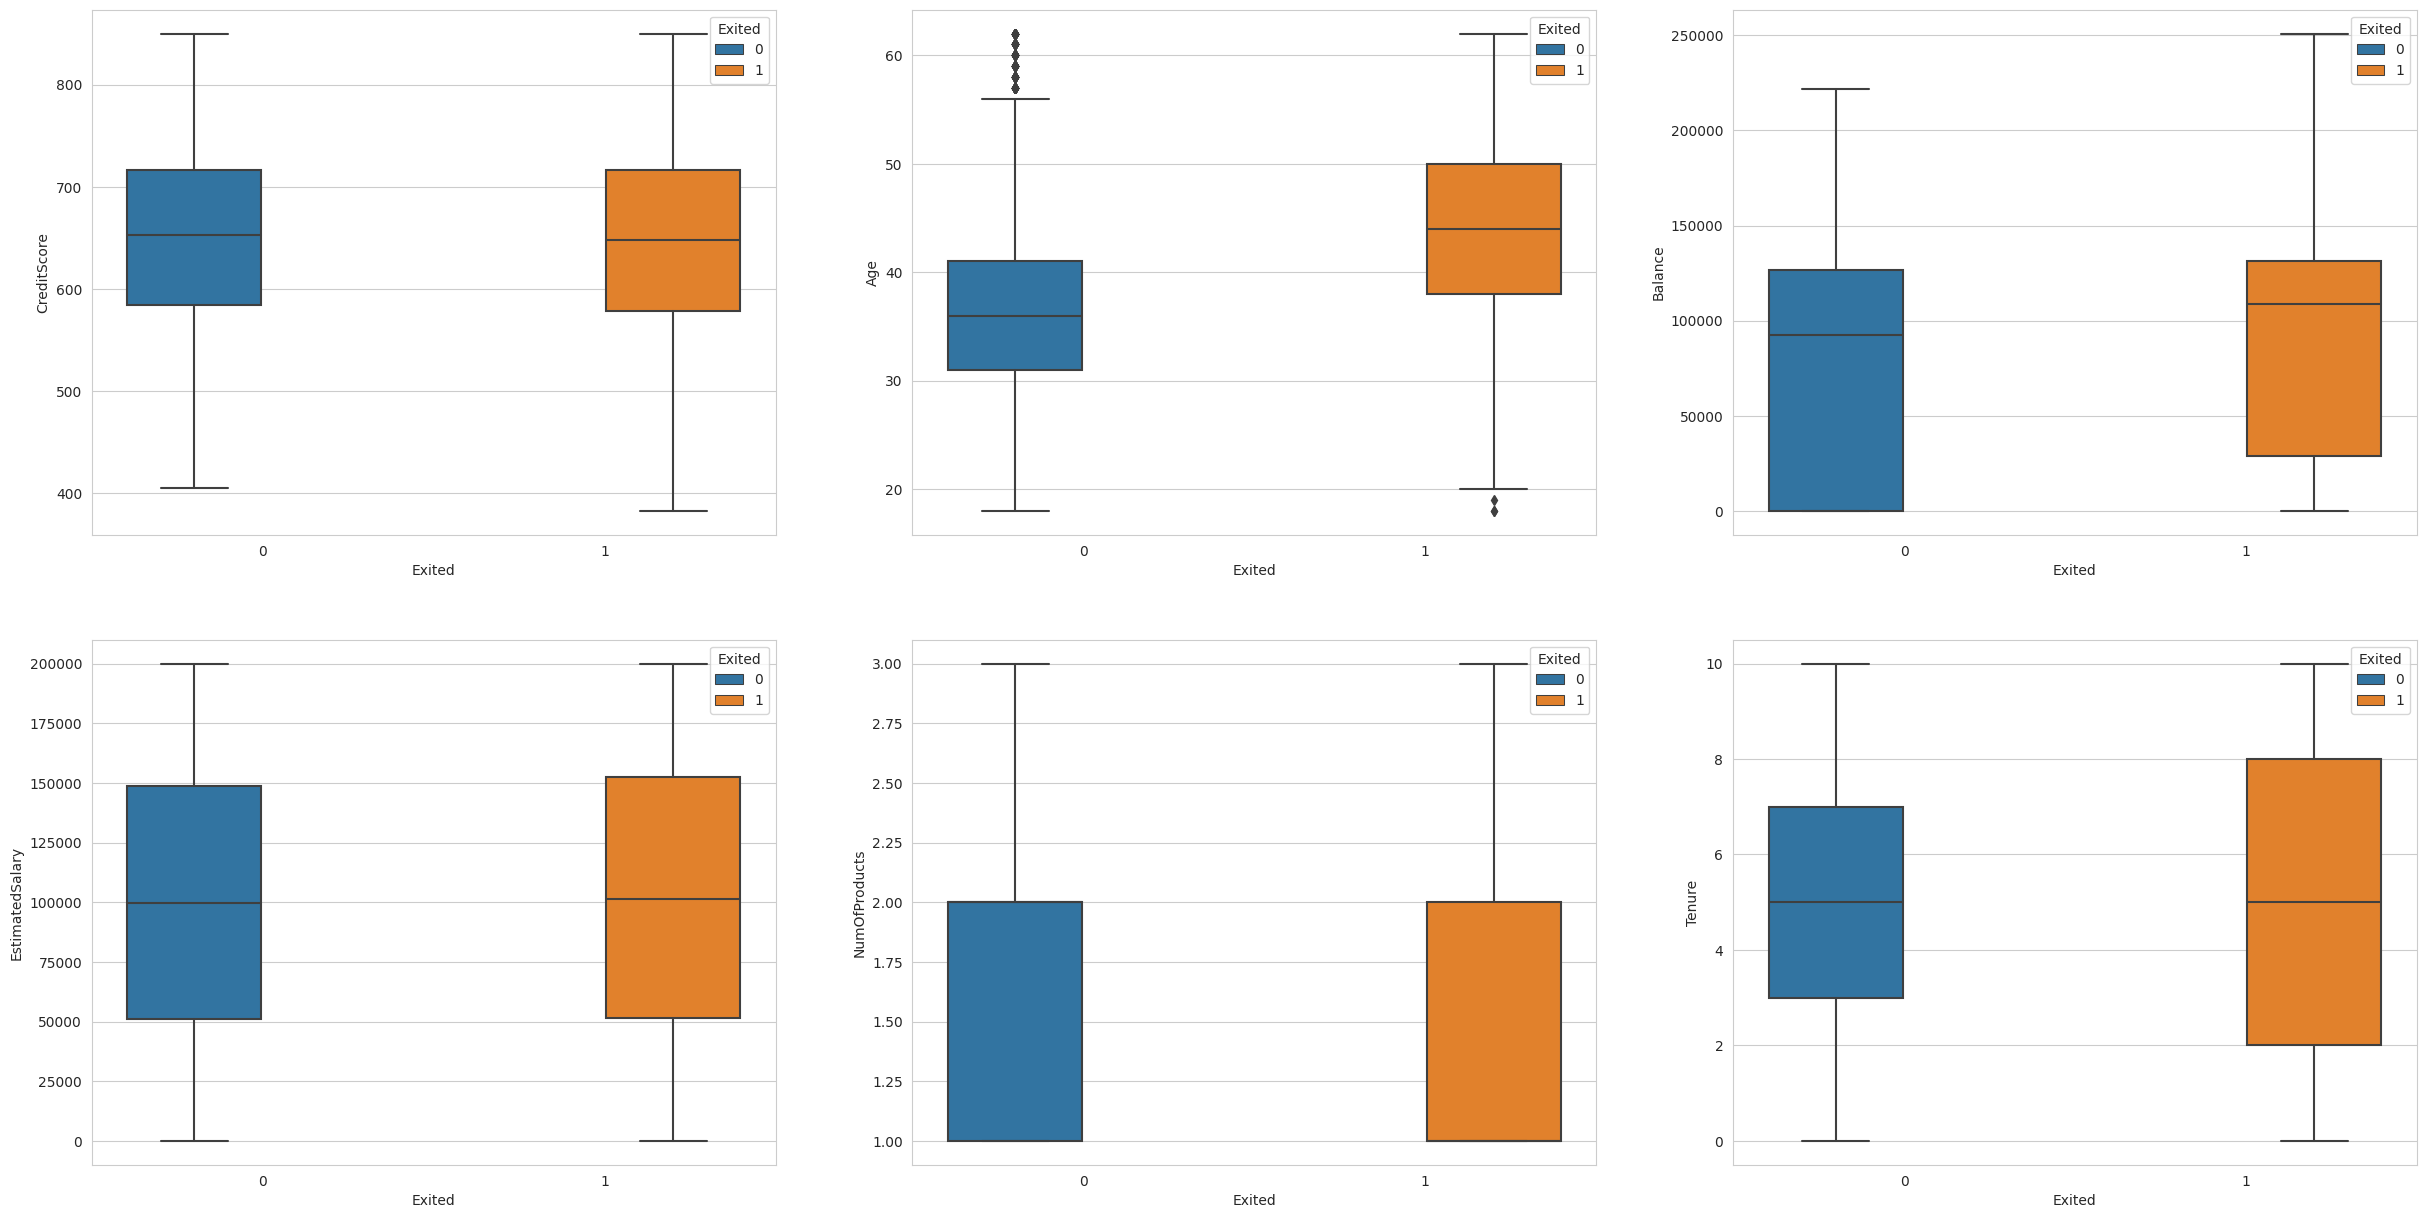

In [17]:

fig, ax = plt.subplots(2, 3, figsize=(30, 15))

sns.boxplot(data=df, x='Exited', y='CreditScore', hue='Exited', ax=ax[0][0])
sns.boxplot(data=df, x='Exited', y='Age', hue='Exited', ax=ax[0][1])
sns.boxplot(data=df, x='Exited', y='Balance', hue='Exited', ax=ax[0][2])
sns.boxplot(data=df, x='Exited', y='EstimatedSalary', hue='Exited', ax=ax[1][0])
sns.boxplot(data=df, x='Exited', y='NumOfProducts', hue='Exited', ax=ax[1][1])
sns.boxplot(data=df, x='Exited', y='Tenure', hue='Exited', ax=ax[1][2])

**CountPlot**

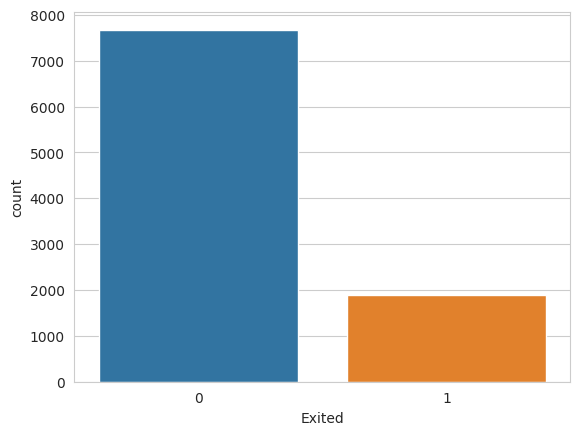

In [18]:
sns.countplot(x='Exited', data=df)
plt.show()

In [19]:
df['Exited'].value_counts()

0    7677
1    1891
Name: Exited, dtype: int64

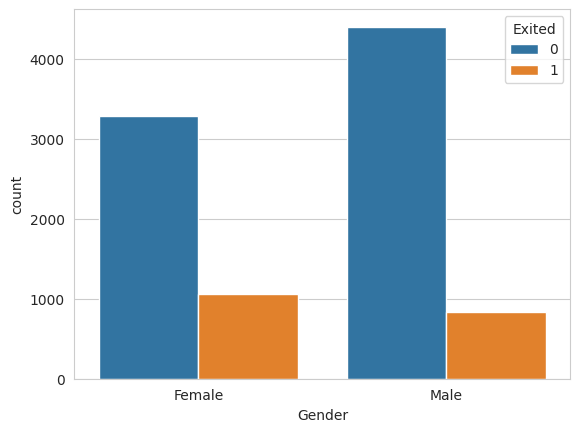

In [20]:
sns.countplot(x="Gender", hue="Exited", data=df)
plt.show()

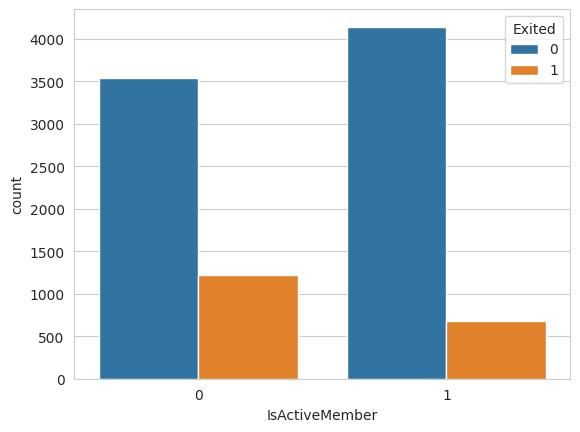

In [21]:
sns.countplot(x="IsActiveMember", hue="Exited", data=df)
plt.show()

<Axes: xlabel='Tenure', ylabel='count'>

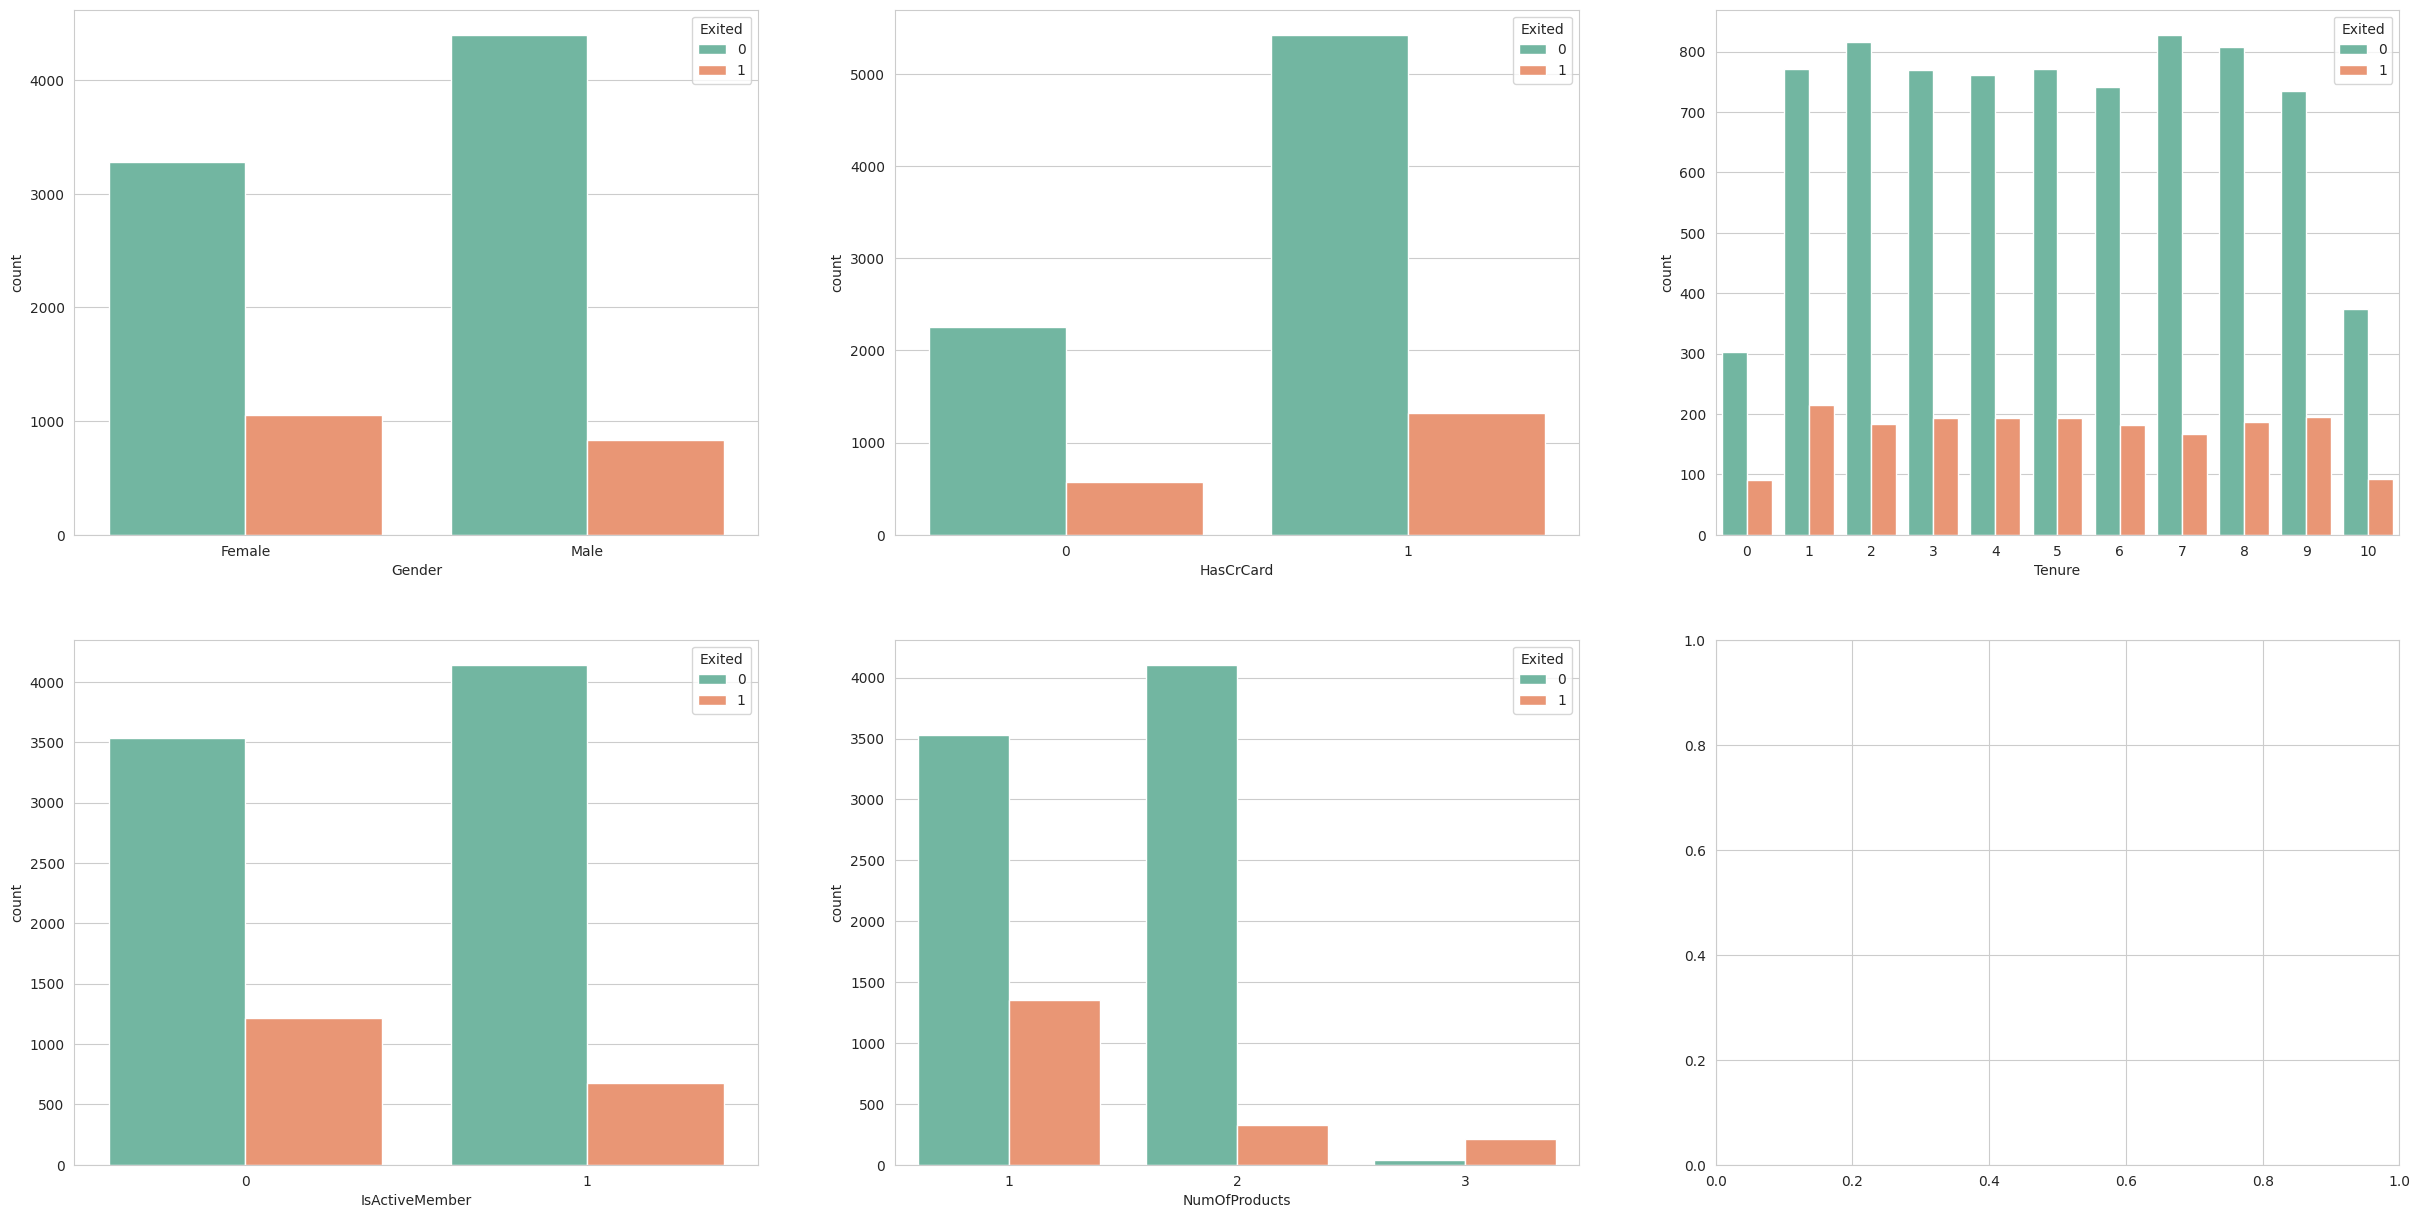

In [22]:
fig, ax = plt.subplots(2, 3, figsize=(30, 15))

sns.countplot(x='Gender', hue='Exited', data=df, palette='Set2', ax=ax[0][0])
sns.countplot(x='HasCrCard', hue='Exited', data=df, palette='Set2', ax=ax[0][1])
sns.countplot(x='IsActiveMember', hue='Exited', data=df, palette='Set2', ax=ax[1][0])
sns.countplot(x='NumOfProducts', hue='Exited', data=df, palette='Set2', ax=ax[1][1])
sns.countplot(x='Tenure', hue='Exited', data=df, palette='Set2', ax=ax[0][2])

**Label Encoding**

In [23]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [24]:
encoder = preprocessing.LabelEncoder()
df["Gender"] = encoder.fit_transform(df["Gender"])
df["Geography"] = encoder.fit_transform(df["Geography"])

<ipython-input-24-5f7859c9d956>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Gender"] = encoder.fit_transform(df["Gender"])
<ipython-input-24-5f7859c9d956>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Geography"] = encoder.fit_transform(df["Geography"])


In [25]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


**Correlation Matrix**

<ipython-input-26-1b9b85051144>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="RdYlBu")


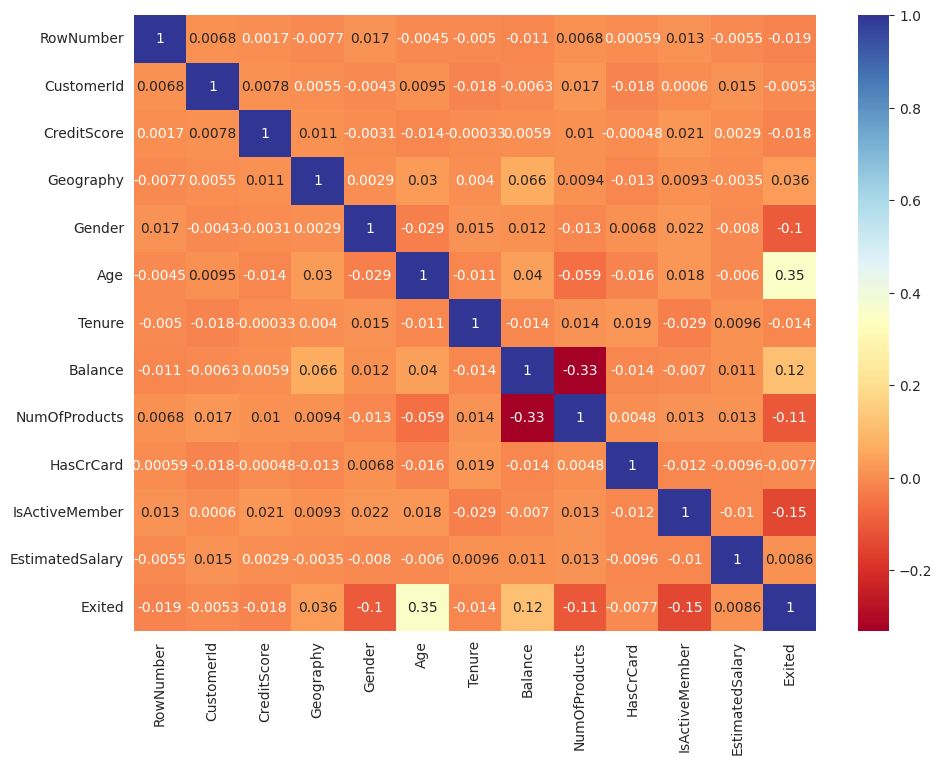

In [26]:
# checking correlation matrix with heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(11,8))
sns.heatmap(df.corr(), annot=True, cmap="RdYlBu")
plt.show()